# Steam Review Classification

1. Hit play button (or `Shift+Enter`) to execute a cell.
1. If you encounter any issue, press `Kernel -> Restart Kernel` to restart.

---

#### Name: 王軒
#### Student ID: 0816095

---

_TA_ once **said**
> Please use jupyter

[See more `markdown` useage](https://www.markdownguide.org/basic-syntax/)

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib3

%matplotlib inline

In [16]:
df1 = pd.read_json('review.jl', lines=True)
df2 = pd.read_json('products.jl', lines=True)

In [17]:
df1 = df1[['product_id', 'recommended', 'text']]
df1 = df1.dropna()
df1

,product_id,recommended,text
0,1644960,False,this game is ♥♥♥♥ if u dont have ur moms credi...
1,1644960,True,Was happy with NBA2K21 but somehow I felt the ...
2,1644960,True,"Its honestly an amazing game, very fun to buil..."
3,1644960,False,"This game is garbage. Pure hot garbage, Server..."
4,1644960,False,"I cant stand this game anymore, I really tried..."
...,...,...,...
47995,285190,True,this game is great
47996,285190,False,If you are a warhammer fan go for soulstorm or...
47997,285190,True,I wish the 40k community hadn't killed this ga...
47998,285190,True,I would recommend this game.\nDespite the hone...


In [18]:
df2['tags'] = df2['tags'].apply(','.join)
# df2['genres'] = df2['genres'].apply(','.join)
df2 = df2[['id', 'tags']]
df2 = df2.dropna()
df2 = df2.rename({'id':'product_id'}, axis='columns')
df2

,product_id,tags
0,1644960,"Sports,Basketball,Simulation,eSports,Realistic..."
1,1644960,"Zombies,Online Co-Op,Action,Multiplayer,Shoote..."
2,872410,"Simulation,Strategy,Historical,Singleplayer,Gr..."
3,1517290,"Shooter,Action,Multiplayer,FPS,War,First-Perso..."
4,1063730,"Massively Multiplayer,Open World,MMORPG,Advent..."
...,...,...
74,65980,"Strategy,Turn-Based Strategy,Sci-fi,Space,4X,T..."
75,548570,"Action,FPS,Open World,Post-apocalyptic,Vehicul..."
76,48240,"Strategy,City Builder,Simulation,Futuristic,RT..."
77,402710,"Open World Survival Craft,Horror,Survival,Spac..."


In [19]:
df3=pd.merge(df2,df1,on='product_id',how='inner')
df3 = df3.drop(['product_id'], axis = 1)
df3

,tags,recommended,text
0,"Sports,Basketball,Simulation,eSports,Realistic...",False,this game is ♥♥♥♥ if u dont have ur moms credi...
1,"Sports,Basketball,Simulation,eSports,Realistic...",True,Was happy with NBA2K21 but somehow I felt the ...
2,"Sports,Basketball,Simulation,eSports,Realistic...",True,"Its honestly an amazing game, very fun to buil..."
3,"Sports,Basketball,Simulation,eSports,Realistic...",False,"This game is garbage. Pure hot garbage, Server..."
4,"Sports,Basketball,Simulation,eSports,Realistic...",False,"I cant stand this game anymore, I really tried..."
...,...,...,...
47910,"JRPG,RPG,Singleplayer,Great Soundtrack,Story R...",True,"I played the original back in grade school, an..."
47911,"JRPG,RPG,Singleplayer,Great Soundtrack,Story R...",True,The good:\n60FPS\nweapon acc has been incresse...
47912,"JRPG,RPG,Singleplayer,Great Soundtrack,Story R...",True,Disclaimer: This review is being taken from an...
47913,"JRPG,RPG,Singleplayer,Great Soundtrack,Story R...",True,This was one of the first games that really go...


In [20]:
df3 = df3[df3.text.map(lambda x: x.isascii())]
df3.describe()

,tags,recommended,text
count,43914,43914,43914
unique,79,2,38943
top,"Sports,Football,Controller,PvP,Realistic,Immer...",True,good
freq,1081,28832,369


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<Figure size 1080x432 with 0 Axes>

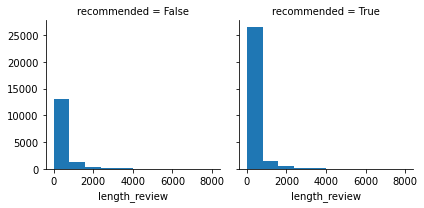

In [21]:
import seaborn as sns
df3['length_review']=df3['text'].apply(len)
plt.figure(figsize=(15,6))
g = sns.FacetGrid(df3,col='recommended')
g.map(plt.hist,'length_review')
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
normal_df = df3[df3['recommended'] == 0]
class_df = df3[df3['recommended'] == 1]

label = np.ones(len(class_df), dtype = int)
class_df.insert(1, 'label', label)

label = np.zeros(len(normal_df), dtype = int)
normal_df.insert(1, 'label', label)

class_df, _ = train_test_split(class_df, train_size = 0.56)
df3 = pd.concat([class_df, normal_df], ignore_index=True)
print("Number of negative samples:", len(df3[df3['label'] == 0]))
print("Number of positive samples:", len(df3[df3['label'] == 1]))
df3

Number of negative samples: 15082
Number of positive samples: 16145


,tags,label,recommended,text,length_review
0,"Action,RPG,Anime,Sports,Casual,Soccer,Multipla...",1,True,Made for Tsubasa fans.\nBetter than anime itself.,48
1,"Automobile Sim,Simulation,Driving,Realistic,Si...",1,True,This won't be a professional review i must say...,2448
2,"Strategy,Simulation,Base Building,Villain Prot...",1,True,Totally lived up to the hype and expectations....,64
3,"Massively Multiplayer,Open World,MMORPG,Advent...",1,True,Nice game. It gives me the same feeling I got ...,253
4,"Action,Adventure,Multiplayer,Third-Person Shoo...",1,True,TOp game,8
...,...,...,...,...,...
31222,"JRPG,RPG,Singleplayer,Great Soundtrack,Story R...",0,False,Honestly I think the only real thing I have is...,380
31223,"JRPG,RPG,Singleplayer,Great Soundtrack,Story R...",0,False,"It makes me sad, because this was one of my fa...",1690
31224,"JRPG,RPG,Singleplayer,Great Soundtrack,Story R...",0,False,The game crashes. A lot.,24
31225,"JRPG,RPG,Singleplayer,Great Soundtrack,Story R...",0,False,Long time SE fan here. I've owned just about e...,3041


<Figure size 1080x432 with 0 Axes>

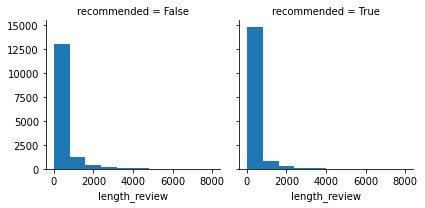

In [23]:
df3['length_review']=df3['text'].apply(len)
plt.figure(figsize=(15,6))
g = sns.FacetGrid(df3,col='recommended')
g.map(plt.hist,'length_review')
plt.show()

In [24]:
df3

,tags,label,recommended,text,length_review
0,"Action,RPG,Anime,Sports,Casual,Soccer,Multipla...",1,True,Made for Tsubasa fans.\nBetter than anime itself.,48
1,"Automobile Sim,Simulation,Driving,Realistic,Si...",1,True,This won't be a professional review i must say...,2448
2,"Strategy,Simulation,Base Building,Villain Prot...",1,True,Totally lived up to the hype and expectations....,64
3,"Massively Multiplayer,Open World,MMORPG,Advent...",1,True,Nice game. It gives me the same feeling I got ...,253
4,"Action,Adventure,Multiplayer,Third-Person Shoo...",1,True,TOp game,8
...,...,...,...,...,...
31222,"JRPG,RPG,Singleplayer,Great Soundtrack,Story R...",0,False,Honestly I think the only real thing I have is...,380
31223,"JRPG,RPG,Singleplayer,Great Soundtrack,Story R...",0,False,"It makes me sad, because this was one of my fa...",1690
31224,"JRPG,RPG,Singleplayer,Great Soundtrack,Story R...",0,False,The game crashes. A lot.,24
31225,"JRPG,RPG,Singleplayer,Great Soundtrack,Story R...",0,False,Long time SE fan here. I've owned just about e...,3041


In [25]:
df3 = df3[df3['length_review']<2000]
df3 = df3.drop(['length_review'], axis = 1)

In [26]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

X = df3.drop(['recommended'], axis=1)
y = df3['recommended']

encoder = LabelEncoder()
y = encoder.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)



tokenizer = Tokenizer(num_words = 30000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train['text'])
tokenizer.fit_on_texts(X_train['tags'])
word_index = tokenizer.word_index

# df3['text'] = df3[['text','tags']].apply(lambda x: ','.join(x.dropna().astype(str)),axis=1)

sequences = tokenizer.texts_to_sequences(X_train['tags'])
tags = pad_sequences(sequences, padding='post', maxlen=35)


sequences = tokenizer.texts_to_sequences(X_train['text'])
reviews = pad_sequences(sequences, padding='post', maxlen=411)

X_train_tf = np.append(tags, reviews, axis=1)
X_train_tf2 = reviews

sequences = tokenizer.texts_to_sequences(X_test['tags'])
tags = pad_sequences(sequences, padding='post', maxlen=35)


sequences = tokenizer.texts_to_sequences(X_test['text'])
reviews = pad_sequences(sequences, padding='post', maxlen=411)

X_test_tf = np.append(tags, reviews, axis=1)
X_test_tf2 = reviews





print(X_train_tf)
print(y_train)
# print(X_test)
# print(y_test)

[[ 11  58  21 ...   0   0   0]
 [138  39  22 ...   0   0   0]
 [ 21  18  11 ...   0   0   0]
 ...
 [ 22  35  25 ...   0   0   0]
 [ 22 189  22 ...   0   0   0]
 [ 22  35  25 ...   0   0   0]]
[0 1 0 ... 1 1 0]


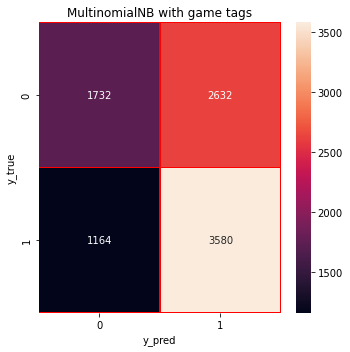

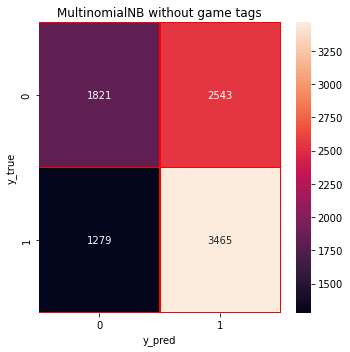

+---------------+-------------------+---------------------+--------------------+--------------------+--------------------+
|     Model     |        data       | Sensitivity(Recall) |     Precision      |      Accuracy      |      f1 score      |
+---------------+-------------------+---------------------+--------------------+--------------------+--------------------+
| MultinomialNB |   With game tags  |  0.5757605148980699 | 0.5871851131120305 | 0.5832235397452789 | 0.5653290849347804 |
| MultinomialNB | Without game tags |  0.5738370084533428 | 0.5820751900691551 | 0.580368906455863  | 0.5662366860932476 |
+---------------+-------------------+---------------------+--------------------+--------------------+--------------------+


In [27]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, f1_score
import prettytable as pt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB


mnb = MultinomialNB()
mnb.fit(X_train_tf, y_train)
y_pred = mnb.predict(X_test_tf)


cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("MultinomialNB with game tags")
plt.tight_layout()
plt.show()

tb1 = pt.PrettyTable()
tb1.field_names = ["Model", "data", "Sensitivity(Recall)", "Precision", "Accuracy", "f1 score"]
tb1.add_row(['MultinomialNB', "With game tags", recall, precision, accuracy, f1])


mnb = MultinomialNB()
mnb.fit(X_train_tf2, y_train)
y_pred = mnb.predict(X_test_tf2)

cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("MultinomialNB without game tags")
plt.tight_layout()
plt.show()

tb1.add_row(['MultinomialNB', "Without game tags", recall, precision, accuracy, f1])
print(tb1)



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


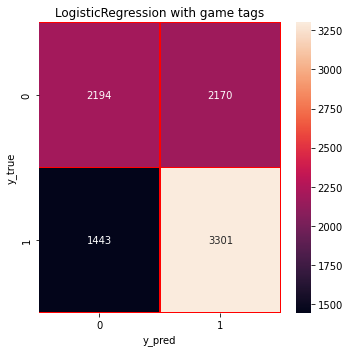

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


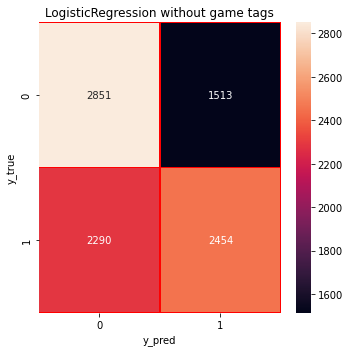

+--------------------+-------------------+---------------------+--------------------+--------------------+--------------------+
|       Model        |        data       | Sensitivity(Recall) |     Precision      |      Accuracy      |      f1 score      |
+--------------------+-------------------+---------------------+--------------------+--------------------+--------------------+
| LogisticRegression |   With game tags  |  0.5992880388832128 | 0.6033038099707071 | 0.6033157663592447 | 0.5973679501516055 |
| LogisticRegression | Without game tags |  0.5852923582956058 | 0.5865824240413287 | 0.5824549846288977 | 0.5816601730559976 |
+--------------------+-------------------+---------------------+--------------------+--------------------+--------------------+


In [28]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train_tf, y_train)
y_pred = lr.predict(X_test_tf)


cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("LogisticRegression with game tags")
plt.tight_layout()
plt.show()

tb1 = pt.PrettyTable()
tb1.field_names = ["Model", "data", "Sensitivity(Recall)", "Precision", "Accuracy", "f1 score"]
tb1.add_row(['LogisticRegression', "With game tags", recall, precision, accuracy, f1])


lr=LogisticRegression()
lr.fit(X_train_tf2, y_train)
y_pred = lr.predict(X_test_tf2)

cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("LogisticRegression without game tags")
plt.tight_layout()
plt.show()

tb1.add_row(['LogisticRegression', "Without game tags", recall, precision, accuracy, f1])
print(tb1)

In [29]:
from tensorflow.keras.utils import to_categorical
# y_train = to_categorical(y_train)
y_test_transform = to_categorical(y_test)
# print(y_train.shape)
print(y_test_transform)

[[0. 1.]
 [0. 1.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [30]:
import tensorflow as tf
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow import keras
def build_model():
    model = Sequential()
    model.add(Dense(1024, input_dim=X_train_tf.shape[1], activation='relu'))
    model.add(Dense(2, activation='softmax'))
    optimizer = keras.optimizers.Adam(learning_rate=5e-5)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model



print("Compile model ...")
callback = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy", patience=2, verbose=1, factor=0.5, min_lr=5e-5)
estimator = KerasClassifier(build_fn=build_model, epochs=5, batch_size=512)
estimator.fit(X_train_tf, y_train, validation_data=(X_test_tf, y_test_transform), callbacks=[callback])

Compile model ...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              457728    
                                                                 
 dense_1 (Dense)             (None, 2)                 2050      
                                                                 
Total params: 459,778
Trainable params: 459,778
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.


Epoch 1/5
42/42 [==============================] - 2s 39ms/step - loss: 165.7312 - accuracy: 0.5134 - val_loss: 102.4222 - val_accuracy: 0.5337 - lr: 5.0000e-05
Epoch 2/5
42/42 [==============================] - 1s 35ms/step - loss: 96.4084 - accuracy: 0.5556 - val_loss: 78.2959 - val_accuracy: 0.5483 - lr: 5.0000e-05
Epoch 3/5
42/42 [==============================] - 1s 35ms/step - loss: 73.7461 - accuracy: 0.5632 - val_loss: 68.8364 - val_accuracy: 0.5639 - lr: 5.0000e-05
Epoch 4/5
42/42 [==============================] - 1s 35ms/step - loss: 63.0638 - accuracy: 0.5735 - val_loss: 65.6144 - val_accuracy: 0.5671 - lr: 5.0000e-05
Epoch 5/5
42/42 [==============================] - 1s 34ms/step - loss: 55.7218 - accuracy: 0.5796 - val_loss: 63.3914 - val_accuracy: 0.5666 - lr: 5.0000e-05


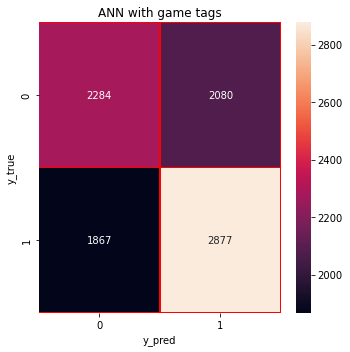

+-------+----------------+---------------------+--------------------+--------------------+--------------------+
| Model |      data      | Sensitivity(Recall) |     Precision      |      Accuracy      |      f1 score      |
+-------+----------------+---------------------+--------------------+--------------------+--------------------+
|  ANN  | With game tags |  0.5649116525983712 | 0.5653101131304745 | 0.5666447079490557 | 0.5647998950172095 |
+-------+----------------+---------------------+--------------------+--------------------+--------------------+


In [31]:
y_pred = estimator.predict(X_test_tf)

cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')


f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("ANN with game tags")
plt.tight_layout()
plt.show()

tb1 = pt.PrettyTable()
tb1.field_names = ["Model", "data", "Sensitivity(Recall)", "Precision", "Accuracy", "f1 score"]
tb1.add_row(['ANN', "With game tags", recall, precision, accuracy, f1])
print(tb1)

In [32]:
def build_model():
    model = Sequential()
    model.add(Dense(1024, input_dim=X_train_tf2.shape[1], activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    optimizer = keras.optimizers.Adam(learning_rate=5e-5)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model



print("Compile model ...")
callback = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy", patience=2, verbose=1, factor=0.5, min_lr=5e-5)
estimator = KerasClassifier(build_fn=build_model, epochs=8, batch_size=512)
estimator.fit(X_train_tf2, y_train, validation_data=(X_test_tf2, y_test_transform), callbacks=[callback])

Compile model ...
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1024)              421888    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 512)               524800    
                                                                 
 dense_4 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 947,714
Trainable params: 947,714
Non-trainable params: 0
_________________________________________________________________
Epoch 1/8


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  app.launch_new_instance()


42/42 [==============================] - 4s 79ms/step - loss: 182.2690 - accuracy: 0.5331 - val_loss: 69.9001 - val_accuracy: 0.5487 - lr: 5.0000e-05
Epoch 2/8
42/42 [==============================] - 3s 74ms/step - loss: 148.2964 - accuracy: 0.5320 - val_loss: 57.7535 - val_accuracy: 0.5526 - lr: 5.0000e-05
Epoch 3/8
42/42 [==============================] - 3s 75ms/step - loss: 123.6065 - accuracy: 0.5401 - val_loss: 51.4913 - val_accuracy: 0.5583 - lr: 5.0000e-05
Epoch 4/8
42/42 [==============================] - 3s 74ms/step - loss: 111.0464 - accuracy: 0.5456 - val_loss: 46.9887 - val_accuracy: 0.5585 - lr: 5.0000e-05
Epoch 5/8
42/42 [==============================] - 3s 73ms/step - loss: 99.1133 - accuracy: 0.5405 - val_loss: 46.9160 - val_accuracy: 0.5572 - lr: 5.0000e-05
Epoch 6/8
42/42 [==============================] - 3s 74ms/step - loss: 93.8264 - accuracy: 0.5522 - val_loss: 42.2121 - val_accuracy: 0.5620 - lr: 5.0000e-05
Epoch 7/8
42/42 [==============================] - 3

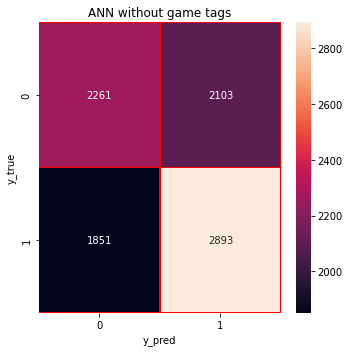

+-------+-------------------+---------------------+--------------------+--------------------+--------------------+
| Model |        data       | Sensitivity(Recall) |     Precision      |      Accuracy      |      f1 score      |
+-------+-------------------+---------------------+--------------------+--------------------+--------------------+
|  ANN  | Without game tags |  0.5639627961722695 | 0.5644586681017967 | 0.5658761528326746 | 0.5637757727338357 |
+-------+-------------------+---------------------+--------------------+--------------------+--------------------+


In [33]:
y_pred = estimator.predict(X_test_tf2)

cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')


f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("ANN without game tags")
plt.tight_layout()
plt.show()

tb1 = pt.PrettyTable()
tb1.field_names = ["Model", "data", "Sensitivity(Recall)", "Precision", "Accuracy", "f1 score"]
tb1.add_row(['ANN', "Without game tags", recall, precision, accuracy, f1])
print(tb1)

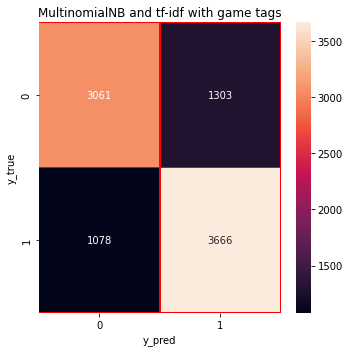

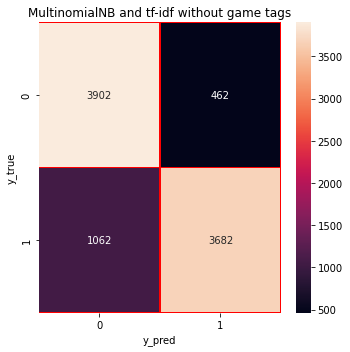

+---------------+--------------------------+---------------------+--------------------+--------------------+--------------------+
|     Model     |           data           | Sensitivity(Recall) |     Precision      |      Accuracy      |      f1 score      |
+---------------+--------------------------+---------------------+--------------------+--------------------+--------------------+
| MultinomialNB |  tf-idf with game tags   |  0.7370931567956747 | 0.7386624080655464 | 0.7385814668423364 | 0.7374228987730531 |
| MultinomialNB | tf-idf without game tags |  0.8351360510570156 | 0.837286571422349  | 0.8326745718050066 | 0.8325768897644481 |
+---------------+--------------------------+---------------------+--------------------+--------------------+--------------------+


In [34]:
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

pipeline = Pipeline(steps=[
    ('tfidf', TfidfVectorizer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

pipeline.fit(X_train['tags'] + X_train['text'],y_train)

y_pred = pipeline.predict(X_test['tags'] + X_test['text'])

cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')


f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("MultinomialNB and tf-idf with game tags")
plt.tight_layout()
plt.show()

tb1 = pt.PrettyTable()
tb1.field_names = ["Model", "data", "Sensitivity(Recall)", "Precision", "Accuracy", "f1 score"]
tb1.add_row(['MultinomialNB', "tf-idf with game tags", recall, precision, accuracy, f1])


pipeline.fit(X_train['text'],y_train)

y_pred = pipeline.predict(X_test['text'])

cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')


f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("MultinomialNB and tf-idf without game tags")
plt.tight_layout()
plt.show()


tb1.add_row(['MultinomialNB', "tf-idf without game tags", recall, precision, accuracy, f1])
print(tb1)

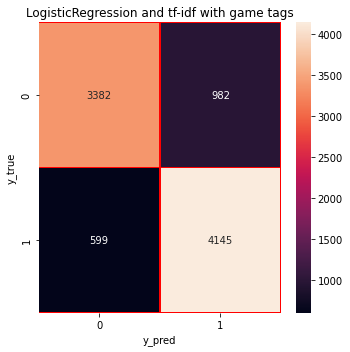

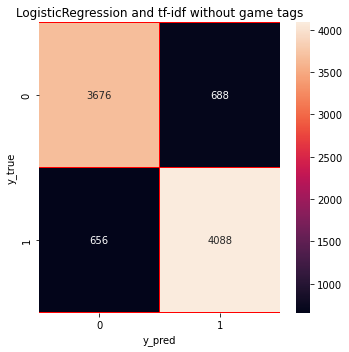

+--------------------+--------------------------+---------------------+--------------------+--------------------+--------------------+
|       Model        |           data           | Sensitivity(Recall) |     Precision      |      Accuracy      |      f1 score      |
+--------------------+--------------------------+---------------------+--------------------+--------------------+--------------------+
| LogisticRegression |  tf-idf with game tags   |  0.8243561648811446 | 0.8290001409562596 | 0.8264163372859025 | 0.8251895467103829 |
| LogisticRegression | tf-idf without game tags |  0.8520332692905158 | 0.8522575945285058 | 0.852437417654809  | 0.8521348557822392 |
+--------------------+--------------------------+---------------------+--------------------+--------------------+--------------------+


In [35]:
pipeline = Pipeline(steps=[
    ('tfidf', TfidfVectorizer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LogisticRegression()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

pipeline.fit(X_train['tags'] + X_train['text'],y_train)

y_pred = pipeline.predict(X_test['tags'] + X_test['text'])

cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')


f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("LogisticRegression and tf-idf with game tags")
plt.tight_layout()
plt.show()

tb1 = pt.PrettyTable()
tb1.field_names = ["Model", "data", "Sensitivity(Recall)", "Precision", "Accuracy", "f1 score"]
tb1.add_row(['LogisticRegression', "tf-idf with game tags", recall, precision, accuracy, f1])


pipeline.fit(X_train['text'],y_train)

y_pred = pipeline.predict(X_test['text'])

cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')


f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("LogisticRegression and tf-idf without game tags")
plt.tight_layout()
plt.show()


tb1.add_row(['LogisticRegression', "tf-idf without game tags", recall, precision, accuracy, f1])
print(tb1)

Compile model ...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1024)              32579584  
                                                                 
 dense_6 (Dense)             (None, 512)               524800    
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 dense_9 (Dense)             (None, 2)                 258       
                                                                 
Total params: 33,268,866
Trainable params: 33,268,866
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:450: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_2/dense_5/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_2/dense_5/embedding_lookup_sparse/Reshape:0", shape=(None, 1024), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_2/dense_5/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


42/42 [==============================] - 23s 523ms/step - loss: 0.6861 - accuracy: 0.5954 - val_loss: 0.6687 - val_accuracy: 0.6741 - lr: 5.0000e-05
Epoch 2/5
42/42 [==============================] - 22s 522ms/step - loss: 0.6117 - accuracy: 0.7286 - val_loss: 0.5356 - val_accuracy: 0.7585 - lr: 5.0000e-05
Epoch 3/5
42/42 [==============================] - 22s 517ms/step - loss: 0.4075 - accuracy: 0.8465 - val_loss: 0.3863 - val_accuracy: 0.8305 - lr: 5.0000e-05
Epoch 4/5
42/42 [==============================] - 22s 517ms/step - loss: 0.2474 - accuracy: 0.9098 - val_loss: 0.3688 - val_accuracy: 0.8407 - lr: 5.0000e-05
Epoch 5/5
42/42 [==============================] - 22s 516ms/step - loss: 0.1595 - accuracy: 0.9471 - val_loss: 0.3937 - val_accuracy: 0.8372 - lr: 5.0000e-05


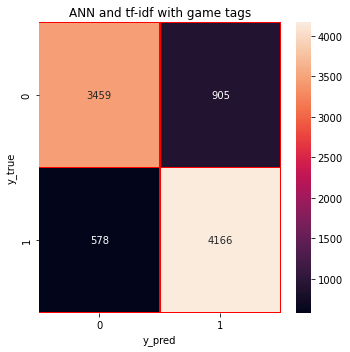

+-------+-----------------------+---------------------+--------------------+--------------------+--------------------+
| Model |          data         | Sensitivity(Recall) |     Precision      |      Accuracy      |      f1 score      |
+-------+-----------------------+---------------------+--------------------+--------------------+--------------------+
|  ANN  | tf-idf with game tags |  0.8353916684570832 | 0.8391792943472446 | 0.8371761089152393 | 0.8361890668353711 |
+-------+-----------------------+---------------------+--------------------+--------------------+--------------------+


In [36]:
tf_idf = TfidfVectorizer()
X_train_tf = tf_idf.fit_transform(X_train['tags'] + X_train['text']).astype('float16')
X_test_tf = tf_idf.transform(X_test['tags'] + X_test['text']).astype('float16')


def build_model():
    model = Sequential()
    model.add(Dense(1024, input_dim=X_train_tf.shape[1], activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    optimizer = keras.optimizers.Adam(learning_rate=5e-5)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

print("Compile model ...")
callback = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy", patience=2, verbose=1, factor=0.5, min_lr=5e-6)
estimator = KerasClassifier(build_fn=build_model, epochs=5, batch_size=512)
estimator.fit(X_train_tf, y_train, validation_data=(X_test_tf, y_test_transform), callbacks=[callback])


y_pred = estimator.predict(X_test_tf)

cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')


f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("ANN and tf-idf with game tags")
plt.tight_layout()
plt.show()

tb1 = pt.PrettyTable()
tb1.field_names = ["Model", "data", "Sensitivity(Recall)", "Precision", "Accuracy", "f1 score"]
tb1.add_row(['ANN', "tf-idf with game tags", recall, precision, accuracy, f1])
print(tb1)

Compile model ...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1024)              24931328  
                                                                 
 dense_11 (Dense)            (None, 512)               524800    
                                                                 
 dense_12 (Dense)            (None, 256)               131328    
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dense_14 (Dense)            (None, 2)                 258       
                                                                 
Total params: 25,620,610
Trainable params: 25,620,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:450: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_3/dense_10/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_3/dense_10/embedding_lookup_sparse/Reshape:0", shape=(None, 1024), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_3/dense_10/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


42/42 [==============================] - 17s 397ms/step - loss: 0.6867 - accuracy: 0.6457 - val_loss: 0.6719 - val_accuracy: 0.7456 - lr: 5.0000e-05
Epoch 2/5
42/42 [==============================] - 17s 396ms/step - loss: 0.6124 - accuracy: 0.8127 - val_loss: 0.5216 - val_accuracy: 0.8249 - lr: 5.0000e-05
Epoch 3/5
42/42 [==============================] - 17s 395ms/step - loss: 0.3771 - accuracy: 0.8801 - val_loss: 0.3484 - val_accuracy: 0.8524 - lr: 5.0000e-05
Epoch 4/5
42/42 [==============================] - 17s 395ms/step - loss: 0.2298 - accuracy: 0.9160 - val_loss: 0.3384 - val_accuracy: 0.8535 - lr: 5.0000e-05
Epoch 5/5
42/42 [==============================] - 17s 395ms/step - loss: 0.1674 - accuracy: 0.9435 - val_loss: 0.3592 - val_accuracy: 0.8524 - lr: 5.0000e-05


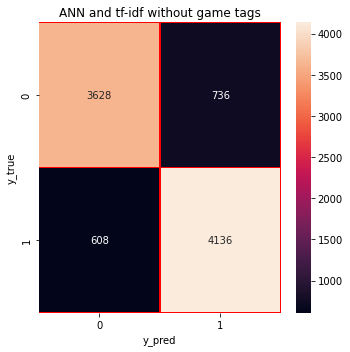

+-------+--------------------------+---------------------+-------------------+-------------------+--------------------+
| Model |           data           | Sensitivity(Recall) |     Precision     |      Accuracy     |      f1 score      |
+-------+--------------------------+---------------------+-------------------+-------------------+--------------------+
|  ANN  | tf-idf without game tags |  0.8515927495080863 | 0.852700521451132 | 0.852437417654809 | 0.8519769376620362 |
+-------+--------------------------+---------------------+-------------------+-------------------+--------------------+


In [37]:
tf_idf = TfidfVectorizer()
X_train_tf2 = tf_idf.fit_transform(X_train['text']).astype('float16')
X_test_tf2 = tf_idf.transform(X_test['text']).astype('float16')


def build_model():
    model = Sequential()
    model.add(Dense(1024, input_dim=X_train_tf2.shape[1], activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    optimizer = keras.optimizers.Adam(learning_rate=5e-5)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

print("Compile model ...")
callback = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy", patience=2, verbose=1, factor=0.5, min_lr=5e-6)
estimator = KerasClassifier(build_fn=build_model, epochs=5, batch_size=512)
estimator.fit(X_train_tf2, y_train, validation_data=(X_test_tf2, y_test_transform), callbacks=[callback])

y_pred = estimator.predict(X_test_tf2)

cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')


f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("ANN and tf-idf without game tags")
plt.tight_layout()
plt.show()

tb1 = pt.PrettyTable()
tb1.field_names = ["Model", "data", "Sensitivity(Recall)", "Precision", "Accuracy", "f1 score"]
tb1.add_row(['ANN', "tf-idf without game tags", recall, precision, accuracy, f1])
print(tb1)

In [46]:
while True:
  print("please enter a review:")
  review = []
  new = input()
  review.append(new)
  if(new == "exit"):
    break
  test = tf_idf.transform(review).astype('float16')
  pred = estimator.predict(test)
  if(pred == 1):
    print("positive review!\n")
  else:
    print("negative review :(\n")

please enter a review:
Not the new gen though. But good.
positive review!

please enter a review:
Not as exciting as the 11th installment, but complex and dramatic enough for Three Kingdom fans.
positive review!

please enter a review:
Can be fun with a dedicated group of people who communicate well. Even so, it often got pretty frustrating for us. Just wave after wave of zombies, and you can't ever really stop. Always felt stressful, even when we were killing it.
negative review :(

please enter a review:
Sadly this is not anything like left 4 dead but it doesn’t mind riding the coattails of the title. It seems TR come up with good ideas for games but poorly execute them. The game feels lifeless and boring. Character don’t have personality and so can’t bounce off one another. All levels just feels the same. Balancing is bad. Online is toxic. No real versus mode. The list goes on and on and on. Maybe add a workshop option to give this game a fighting chance.\nMy verdict….Uninstalled wi